In [3]:
# === IMPORTAR RUTAS ===
from rutas import (
    datos_crudos,
    datos_consolidados,
    datos_imputados,
    datos_prediccion,
    archivo_crudo_unificado,
    archivo_imputado,
    reporte_validacion,
    predicciones_heladas
)

print("Rutas importadas correctamente")
import pandas as pd
from datetime import datetime
import os


Rutas importadas correctamente


UNION MADRID

In [4]:

# ----------------------------------------------------------
# 📂 Cargar archivos desde la carpeta DatosCrudos
# ----------------------------------------------------------
archivos = [
    datos_crudos/'otrosMadrid1995-2000.csv',
    datos_crudos/'otrosMadrid2000-2025.csv',
    datos_crudos/'tmaxtminMadrid1995-2000.csv',
    datos_crudos/'tmaxtminMadrid2000-2025.csv'
]

dataframes = {}

print("📂 Cargando archivos...")
for archivo in archivos:
    df = pd.read_csv(archivo)
    df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")
    
    df_wide = df.pivot_table(
        index=["Fecha", "CodigoEstacion", "NombreEstacion"],
        columns="Parametro",
        values="Valor",
        aggfunc='first'
    ).reset_index()
    
    dataframes[archivo.name] = df_wide
    print(f"✓ {archivo.name}: {df_wide.shape}")

# ----------------------------------------------------------
# 🔄 Combinar "otros" y "temperatura"
# ----------------------------------------------------------
otros_completo = pd.concat([
    dataframes['otrosMadrid1995-2000.csv'],
    dataframes['otrosMadrid2000-2025.csv']
], ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion'], keep='first')

temp_completo = pd.concat([
    dataframes['tmaxtminMadrid1995-2000.csv'],
    dataframes['tmaxtminMadrid2000-2025.csv']
], ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion'], keep='first')

# ----------------------------------------------------------
# 🔗 Merge final
# ----------------------------------------------------------
df_final = pd.merge(
    otros_completo,
    temp_completo,
    on=["Fecha", "CodigoEstacion", "NombreEstacion"],
    how="outer"
).sort_values(['Fecha', 'CodigoEstacion']).reset_index(drop=True)

# ----------------------------------------------------------
# 🏷️ Renombrar columnas
# ----------------------------------------------------------
df_final = df_final.rename(columns={
    'Temperatura máxima diaria': 'TMax_Madrid',
    'Temperatura mínima diaria': 'TMin_Madrid',
    'Velocidad del viento máxima del día': 'WS2M_MAX_Madrid',
    'Húmeda relativa calculada máxima diaria': 'HRMAX_Madrid',
    'Día pluviométrico (convencional)': 'PREC_Madrid'
})

# ----------------------------------------------------------
# 💾 Guardar salida en DatosConsolidados con versión automática
# ----------------------------------------------------------

# Buscar versiones previas del archivo
base_name = "madrid_climatico_v"
version = 1

# Revisa si ya existen archivos con versiones anteriores
for archivo_existente in os.listdir(datos_consolidados):
    if archivo_existente.startswith(base_name) and archivo_existente.endswith(".csv"):
        num = archivo_existente.replace(base_name, "").replace(".csv", "")
        if num.isdigit():
            version = max(version, int(num) + 1)

# Generar nombre nuevo
nombre_archivo = f"{base_name}{version}.csv"
ruta_salida = datos_consolidados / nombre_archivo

# Guardar sin eliminar versiones anteriores
df_final.to_csv(ruta_salida, index=False)

print(f"\n{'='*70}")
print(f"✅ ARCHIVO GUARDADO EN:")
print(f"   {ruta_salida}")
print(f"📁 Versión generada automáticamente: v{version}")
print(f"{'='*70}")


📂 Cargando archivos...
✓ otrosMadrid1995-2000.csv: (1660, 6)
✓ otrosMadrid2000-2025.csv: (18595, 6)
✓ tmaxtminMadrid1995-2000.csv: (3864, 5)
✓ tmaxtminMadrid2000-2025.csv: (22100, 5)

✅ ARCHIVO GUARDADO EN:
   D:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_consolidados\madrid_climatico_v1.csv
📁 Versión generada automáticamente: v1


BOJACA

In [5]:
import pandas as pd
from rutas import datos_crudos, datos_consolidados  # ✅ mismas rutas que Madrid
import os

# ----------------------------------------------------------
# 📂 Cargar archivos desde la carpeta datos_crudos
# ----------------------------------------------------------
archivos = [
    datos_crudos / 'tminBojaca1995-2000.csv',
    datos_crudos / 'tminBojaca2000-2025.csv',
    datos_crudos / 'hrelTmaxBojaca1995-2000.csv',
    datos_crudos / 'hrelTmaxBojaca2000-2025.csv',
    datos_crudos / 'precipitacionBojaca1995-2000.csv',
    datos_crudos / 'precipitacionBojaca2000-2025.csv'
]

dataframes = {}

print("📂 Cargando archivos de Bojacá...")
for archivo in archivos:
    df = pd.read_csv(archivo, encoding='utf-8', low_memory=False)
    df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

    df_wide = df.pivot_table(
        index=["Fecha", "CodigoEstacion", "NombreEstacion"],
        columns="Parametro",
        values="Valor",
        aggfunc='first'
    ).reset_index()

    dataframes[archivo.name] = df_wide
    print(f"✓ {archivo.name}: {df_wide.shape}")

# ----------------------------------------------------------
# 🔄 Combinar archivos por tipo
# ----------------------------------------------------------
tmin_completo = pd.concat([
    dataframes['tminBojaca1995-2000.csv'],
    dataframes['tminBojaca2000-2025.csv']
], ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion'], keep='first')

tmax_hr_completo = pd.concat([
    dataframes['hrelTmaxBojaca1995-2000.csv'],
    dataframes['hrelTmaxBojaca2000-2025.csv']
], ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion'], keep='first')

prec_completo = pd.concat([
    dataframes['precipitacionBojaca1995-2000.csv'],
    dataframes['precipitacionBojaca2000-2025.csv']
], ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion'], keep='first')

# ----------------------------------------------------------
# 🔗 Merge final
# ----------------------------------------------------------
df_final = pd.merge(
    tmin_completo,
    tmax_hr_completo,
    on=["Fecha", "CodigoEstacion", "NombreEstacion"],
    how="outer"
)

df_final = pd.merge(
    df_final,
    prec_completo,
    on=["Fecha", "CodigoEstacion", "NombreEstacion"],
    how="outer"
).sort_values(['Fecha', 'CodigoEstacion']).reset_index(drop=True)

# ----------------------------------------------------------
# 🏷️ Renombrar columnas
# ----------------------------------------------------------
df_final = df_final.rename(columns={
    'Temperatura máxima diaria': 'TMax_Bojaca',
    'Temperatura mínima diaria': 'TMin_Bojaca',
    'Húmeda relativa calculada máxima diaria': 'HRMAX_Bojaca',
    'Humedad relativa máxima diaria': 'HRMAX_Bojaca',
    'Precipitación': 'PREC_Bojaca',
    'Precipitacion': 'PREC_Bojaca',
    'Día pluviométrico (convencional)': 'PREC_Bojaca'
})

# ----------------------------------------------------------
# 💾 Guardar salida en datos_consolidados con versión automática
# ----------------------------------------------------------
base_name = "bojaca_climatico_v"
version = 1

for archivo_existente in os.listdir(datos_consolidados):
    if archivo_existente.startswith(base_name) and archivo_existente.endswith(".csv"):
        num = archivo_existente.replace(base_name, "").replace(".csv", "")
        if num.isdigit():
            version = max(version, int(num) + 1)

nombre_archivo = f"{base_name}{version}.csv"
ruta_salida = datos_consolidados / nombre_archivo

df_final.to_csv(ruta_salida, index=False)

print(f"\n{'='*70}")
print(f"✅ ARCHIVO GUARDADO EN:")
print(f"   {ruta_salida}")
print(f"📁 Versión generada automáticamente: v{version}")
print(f"{'='*70}")


📂 Cargando archivos de Bojacá...


✓ tminBojaca1995-2000.csv: (3457, 4)
✓ tminBojaca2000-2025.csv: (12271, 4)
✓ hrelTmaxBojaca1995-2000.csv: (1253, 4)
✓ hrelTmaxBojaca2000-2025.csv: (4733, 5)
✓ precipitacionBojaca1995-2000.csv: (1826, 4)
✓ precipitacionBojaca2000-2025.csv: (10189, 4)

✅ ARCHIVO GUARDADO EN:
   D:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_consolidados\bojaca_climatico_v1.csv
📁 Versión generada automáticamente: v1


UNION MOSQUERA

In [6]:
# =============================================================================
# 📍 MOSQUERA - CONSOLIDADO CLIMÁTICO (estructura estandarizada como Madrid)
# =============================================================================

import pandas as pd
from datetime import datetime
from rutas import datos_crudos, datos_consolidados  # ✅ rutas centralizadas

# === ARCHIVOS ===
archivos_mosquera = [
    'tminmosquera1995-2000.csv',
    'tminmosquera2000-2025.csv',
    'tmaxmosquera1995-2000.csv',
    'tmaxmosquera2000-2025.csv',
    'precipitacionmosquera1995-2000.csv',
    'precipitacionMosquera2000-2025.csv',
    'MosquerahumedadRelativaVelocidaddelviento1995-2000.csv',
    'mosquerahrelyvelvientomax2020-2025.csv'
]

dataframes = {}

print("Cargando datos de Mosquera...\n")

# === CARGAR Y PIVOTEAR ===
for archivo in archivos_mosquera:
    archivo_path = datos_crudos / archivo  # ✅ usa la ruta correcta
    try:
        df = pd.read_csv(archivo_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(archivo_path, encoding='latin1')
    except FileNotFoundError:
        print(f"⚠️ No se encontró el archivo: {archivo_path}")
        continue

    df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

    # Pivotear: una columna por parámetro
    df_wide = df.pivot_table(
        index=["Fecha", "CodigoEstacion", "NombreEstacion"],
        columns="Parametro",
        values="Valor",
        aggfunc='first'
    ).reset_index()

    dataframes[archivo] = df_wide
    print(f"✅ {archivo}")
    print(f"   → {list(df_wide.columns[3:])}")

# === UNIR POR VARIABLE ===

# Tmin
tmin_df = pd.concat([
    dataframes['tminmosquera1995-2000.csv'],
    dataframes['tminmosquera2000-2025.csv']
], ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion'])

# Tmax
tmax_df = pd.concat([
    dataframes['tmaxmosquera1995-2000.csv'],
    dataframes['tmaxmosquera2000-2025.csv']
], ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion'])

# Precipitación
prec_df = pd.concat([
    dataframes['precipitacionmosquera1995-2000.csv'],
    dataframes['precipitacionMosquera2000-2025.csv']
], ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion'])

# Humedad Relativa + Velocidad del Viento
hr_vv_df = pd.concat([
    dataframes['MosquerahumedadRelativaVelocidaddelviento1995-2000.csv'],
    dataframes['mosquerahrelyvelvientomax2020-2025.csv']
], ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion'])

# === MERGES SEGUROS ===
df_final = tmin_df.copy()

df_final = pd.merge(df_final, tmax_df, on=["Fecha", "CodigoEstacion", "NombreEstacion"], how="outer")
df_final = pd.merge(df_final, prec_df, on=["Fecha", "CodigoEstacion", "NombreEstacion"], how="outer")
df_final = pd.merge(df_final, hr_vv_df, on=["Fecha", "CodigoEstacion", "NombreEstacion"], how="outer")

# === RENOMBRAR COLUMNAS ===
df_final = df_final.rename(columns={
    # Tmin
    'Temperatura mínima diaria': 'TMin_Mosquera',

    # Tmax
    'Temperatura máxima diaria': 'TMax_Mosquera',

    # Precipitación
    'Día pluviométrico (convencional)': 'PREC_Mosquera',
    'Precipitación': 'PREC_Mosquera',
    'Precipitacion': 'PREC_Mosquera',

    # Humedad Relativa
    'Húmedad relativa calculada máxima diaria': 'HRMAX_Mosquera',
    'Humedad relativa máxima diaria': 'HRMAX_Mosquera',
    'Humedad relativa calculada máxima diaria': 'HRMAX_Mosquera',

    # Velocidad del viento
    'Velocidad del viento máxima diaria': 'VVMAX_Mosquera',
    'Velocidad del viento': 'VVMAX_Mosquera',
    'Velocidad del Viento': 'VVMAX_Mosquera'
})

# === ORDENAR ===
df_final = df_final.sort_values(['Fecha', 'CodigoEstacion']).reset_index(drop=True)

# === RESUMEN ===
print(f"\n{'='*80}")
print("MOSQUERA - CONSOLIDADO CLIMÁTICO")
print(f"{'='*80}")
print(f"Total registros: {len(df_final):,}")
print(f"Período: {df_final['Fecha'].min().date()} → {df_final['Fecha'].max().date()}")
print(f"Estaciones: {df_final['CodigoEstacion'].nunique()}")

print(f"\nCOBERTURA POR VARIABLE:")
for var, nombre in [
    ('TMin_Mosquera', 'T. Mínima'),
    ('TMax_Mosquera', 'T. Máxima'),
    ('PREC_Mosquera', 'Precipitación'),
    ('HRMAX_Mosquera', 'HR Máxima'),
    ('VVMAX_Mosquera', 'Vel. Viento Máx')
]:
    if var in df_final.columns:
        n = df_final[var].notna().sum()
        p = n / len(df_final) * 100
        print(f"  • {nombre:18}: {n:6,} ({p:5.1f}%)")
# ----------------------------------------------------------
# 💾 Guardar salida en datos_consolidados con versión automática
# ----------------------------------------------------------
base_name = "mosquera_climatico_v"
version = 1

for archivo_existente in os.listdir(datos_consolidados):
    if archivo_existente.startswith(base_name) and archivo_existente.endswith(".csv"):
        num = archivo_existente.replace(base_name, "").replace(".csv", "")
        if num.isdigit():
            version = max(version, int(num) + 1)

nombre_archivo = f"{base_name}{version}.csv"
ruta_salida = datos_consolidados / nombre_archivo

df_final.to_csv(ruta_salida, index=False)

print(f"\n{'='*70}")
print(f"✅ ARCHIVO GUARDADO EN:")
print(f"   {ruta_salida}")
print(f"📁 Versión generada automáticamente: v{version}")
print(f"{'='*70}")



Cargando datos de Mosquera...

✅ tminmosquera1995-2000.csv
   → ['Temperatura mínima diaria']
✅ tminmosquera2000-2025.csv
   → ['Temperatura mínima diaria']
✅ tmaxmosquera1995-2000.csv
   → ['Temperatura máxima diaria']
✅ tmaxmosquera2000-2025.csv
   → ['Temperatura máxima diaria']
✅ precipitacionmosquera1995-2000.csv
   → ['Día pluviométrico (convencional)']
✅ precipitacionMosquera2000-2025.csv
   → ['Día pluviométrico (convencional)']
✅ MosquerahumedadRelativaVelocidaddelviento1995-2000.csv
   → ['Húmeda relativa calculada máxima diaria', 'Velocidad del viento máxima del día']
✅ mosquerahrelyvelvientomax2020-2025.csv
   → ['Húmeda relativa calculada máxima diaria', 'Velocidad del viento máxima del día']

MOSQUERA - CONSOLIDADO CLIMÁTICO
Total registros: 13,440
Período: 1995-10-26 → 2025-11-07
Estaciones: 2

COBERTURA POR VARIABLE:
  • T. Mínima         : 12,424 ( 92.4%)
  • T. Máxima         : 11,199 ( 83.3%)
  • Precipitación     : 13,005 ( 96.8%)

✅ ARCHIVO GUARDADO EN:
   D:\Docum

UNION TENJO

In [7]:
# =============================================================================
# 📍 TENJO - CONSOLIDADO CLIMÁTICO (estructura estandarizada como Madrid)
# =============================================================================

import pandas as pd
import os
from datetime import datetime
from rutas import datos_crudos, datos_consolidados  # ✅ rutas centralizadas

# === ARCHIVOS ===
archivos_tenjo = [
    'hrelTenjo1995-2000.csv',
    'hrelTenjo2000-2025.csv',
    'precipitacionTenjo1995-2000.csv',
    'precipitacionTenjo2000-2025.csv',
    'tmaxtminTenjo1995-2000.csv',
    'tmaxtminTenjo2000-2025.csv'
]

dataframes = {}

print("Cargando datos de Tenjo...\n")

# === CARGAR Y PIVOTEAR ===
for archivo in archivos_tenjo:
    archivo_path = datos_crudos / archivo
    try:
        df = pd.read_csv(archivo_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(archivo_path, encoding='latin1')
    except FileNotFoundError:
        print(f"⚠️ No se encontró el archivo: {archivo_path}")
        continue

    df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

    # Pivotear: una columna por parámetro
    df_wide = df.pivot_table(
        index=["Fecha", "CodigoEstacion", "NombreEstacion"],
        columns="Parametro",
        values="Valor",
        aggfunc='first'
    ).reset_index()

    dataframes[archivo] = df_wide
    print(f"✅ {archivo}")
    print(f"   → {list(df_wide.columns[3:])}")

# === UNIR POR VARIABLE ===
tmaxtmin_list, prec_list, hr_list = [], [], []

# Tmin/Tmax
for a in ['tmaxtminTenjo1995-2000.csv', 'tmaxtminTenjo2000-2025.csv']:
    if a in dataframes:
        tmaxtmin_list.append(dataframes[a])
tmaxtmin_df = pd.concat(tmaxtmin_list, ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion']) if tmaxtmin_list else pd.DataFrame(columns=['Fecha', 'CodigoEstacion', 'NombreEstacion'])

# Precipitación
for a in ['precipitacionTenjo1995-2000.csv', 'precipitacionTenjo2000-2025.csv']:
    if a in dataframes:
        prec_list.append(dataframes[a])
prec_df = pd.concat(prec_list, ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion']) if prec_list else pd.DataFrame(columns=['Fecha', 'CodigoEstacion', 'NombreEstacion'])

# Humedad Relativa
for a in ['hrelTenjo1995-2000.csv', 'hrelTenjo2000-2025.csv']:
    if a in dataframes:
        hr_list.append(dataframes[a])
hr_df = pd.concat(hr_list, ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion']) if hr_list else pd.DataFrame(columns=['Fecha', 'CodigoEstacion', 'NombreEstacion'])

# === MERGES SEGUROS ===
df_final = tmaxtmin_df.copy()
df_final = pd.merge(df_final, prec_df, on=["Fecha", "CodigoEstacion", "NombreEstacion"], how="outer")
df_final = pd.merge(df_final, hr_df, on=["Fecha", "CodigoEstacion", "NombreEstacion"], how="outer")

# === RENOMBRAR COLUMNAS ===
df_final = df_final.rename(columns={
    'Temperatura mínima diaria': 'TMin_Tenjo',
    'Temperatura minima diaria': 'TMin_Tenjo',
    'Temperatura máxima diaria': 'TMax_Tenjo',
    'Temperatura maxima diaria': 'TMax_Tenjo',
    'Día pluviométrico (convencional)': 'PREC_Tenjo',
    'Precipitación': 'PREC_Tenjo',
    'Precipitacion': 'PREC_Tenjo',
    'Húmeda relativa calculada máxima diaria': 'HRMAX_Tenjo',
    'Humedad relativa máxima diaria': 'HRMAX_Tenjo',
    'Humedad relativa calculada máxima diaria': 'HRMAX_Tenjo'
})

df_final = df_final.sort_values(['Fecha', 'CodigoEstacion']).reset_index(drop=True)

# === RESUMEN ===
print(f"\n{'='*80}")
print("TENJO - CONSOLIDADO CLIMÁTICO")
print(f"{'='*80}")
print(f"Total registros: {len(df_final):,}")
if not df_final.empty:
    print(f"Período: {df_final['Fecha'].min().date()} → {df_final['Fecha'].max().date()}")
print(f"Estaciones: {df_final['CodigoEstacion'].nunique()}")

print(f"\nCOBERTURA POR VARIABLE:")
for var, nombre in [
    ('TMin_Tenjo', 'T. Mínima'),
    ('TMax_Tenjo', 'T. Máxima'),
    ('PREC_Tenjo', 'Precipitación'),
    ('HRMAX_Tenjo', 'HR Máxima')
]:
    if var in df_final.columns:
        n = df_final[var].notna().sum()
        p = n / len(df_final) * 100 if len(df_final) > 0 else 0
        print(f"  • {nombre:18}: {n:6,} ({p:5.1f}%)")
    else:
        print(f"  • {nombre:18}: NO DISPONIBLE")

# ----------------------------------------------------------
# 💾 Guardar salida en datos_consolidados con versión automática
# ----------------------------------------------------------
base_name = "tenjo_climatico_v"
version = 1

for archivo_existente in os.listdir(datos_consolidados):
    if archivo_existente.startswith(base_name) and archivo_existente.endswith(".csv"):
        num = archivo_existente.replace(base_name, "").replace(".csv", "")
        if num.isdigit():
            version = max(version, int(num) + 1)

nombre_archivo = f"{base_name}{version}.csv"
ruta_salida = datos_consolidados / nombre_archivo

df_final.to_csv(ruta_salida, index=False)

print(f"\n{'='*70}")
print(f"✅ ARCHIVO GUARDADO EN:")
print(f"   {ruta_salida}")
print(f"📁 Versión generada automáticamente: v{version}")
print(f"{'='*70}")


Cargando datos de Tenjo...

✅ hrelTenjo1995-2000.csv
   → ['Húmeda relativa calculada máxima diaria']
✅ hrelTenjo2000-2025.csv
   → ['Húmeda relativa calculada máxima diaria']
✅ precipitacionTenjo1995-2000.csv
   → ['Día pluviométrico (convencional)']
✅ precipitacionTenjo2000-2025.csv
   → ['Día pluviométrico (convencional)']
✅ tmaxtminTenjo1995-2000.csv
   → ['Temperatura máxima diaria', 'Temperatura mínima diaria']
✅ tmaxtminTenjo2000-2025.csv
   → ['Temperatura máxima diaria', 'Temperatura mínima diaria']

TENJO - CONSOLIDADO CLIMÁTICO
Total registros: 29,981
Período: 1995-10-27 → 2025-10-26
Estaciones: 5

COBERTURA POR VARIABLE:
  • T. Mínima         : 15,440 ( 51.5%)
  • T. Máxima         : 10,552 ( 35.2%)
  • Precipitación     : 23,967 ( 79.9%)
  • HR Máxima         :  6,952 ( 23.2%)

✅ ARCHIVO GUARDADO EN:
   D:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_consolidados\tenjo_climatico_v1.csv
📁 Versión generada automáticamente: v1


UNION SUBACHOQUE 

In [8]:
# =============================================================================
# 📍 SUBACHOQUE - CONSOLIDADO CLIMÁTICO (estructura estandarizada como Madrid)
# =============================================================================

import pandas as pd
import os
from datetime import datetime
from rutas import datos_crudos, datos_consolidados  # ✅ rutas centralizadas

# === ARCHIVOS ===
archivos_subachoque = [
    'tminSubachoque2000-2025.csv',
    'precipitacionSubachoque1995-2000.csv',
    'precipitacionSubachoque2000-2025.csv',
    'tmaxSubachoque2000-2025.csv',
    'tmintmaxSubachoque1995-2000.csv'
]

dataframes = {}

print("Cargando datos de Subachoque...\n")

# === CARGAR Y PIVOTEAR ===
for archivo in archivos_subachoque:
    archivo_path = datos_crudos / archivo
    try:
        df = pd.read_csv(archivo_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(archivo_path, encoding='latin1')
    except FileNotFoundError:
        print(f"⚠️ No se encontró el archivo: {archivo_path}")
        continue

    df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

    # Pivotear: una columna por parámetro
    df_wide = df.pivot_table(
        index=["Fecha", "CodigoEstacion", "NombreEstacion"],
        columns="Parametro",
        values="Valor",
        aggfunc='first'
    ).reset_index()

    dataframes[archivo] = df_wide
    print(f"✅ {archivo}")
    print(f"   → {list(df_wide.columns[3:])}")

print(f"\n📁 Archivos cargados: {len(dataframes)}/{len(archivos_subachoque)}")

# === UNIR POR VARIABLE ===
tmin_list, tmax_list, prec_list = [], [], []

# Tmin
for a in ['tminSubachoque2000-2025.csv', 'tmintmaxSubachoque1995-2000.csv']:
    if a in dataframes:
        tmin_list.append(dataframes[a])
tmin_df = pd.concat(tmin_list, ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion']) if tmin_list else pd.DataFrame(columns=['Fecha', 'CodigoEstacion', 'NombreEstacion'])

# Tmax
for a in ['tmaxSubachoque2000-2025.csv', 'tmintmaxSubachoque1995-2000.csv']:
    if a in dataframes:
        tmax_list.append(dataframes[a])
tmax_df = pd.concat(tmax_list, ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion']) if tmax_list else pd.DataFrame(columns=['Fecha', 'CodigoEstacion', 'NombreEstacion'])

# Precipitación
for a in ['precipitacionSubachoque1995-2000.csv', 'precipitacionSubachoque2000-2025.csv']:
    if a in dataframes:
        prec_list.append(dataframes[a])
prec_df = pd.concat(prec_list, ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion']) if prec_list else pd.DataFrame(columns=['Fecha', 'CodigoEstacion', 'NombreEstacion'])
# === MERGES SEGUROS ===
df_final = tmin_df.copy()
df_final = pd.merge(df_final, tmax_df, on=["Fecha", "CodigoEstacion", "NombreEstacion"], how="outer", suffixes=('', '_TMaxTemp'))
df_final = pd.merge(df_final, prec_df, on=["Fecha", "CodigoEstacion", "NombreEstacion"], how="outer", suffixes=('', '_PRECTemp'))


# === CONSOLIDACIÓN Y COALESCENCIA DE COLUMNAS (CORRECCIÓN CRÍTICA) ===
# Definir todas las variantes de nombres por parámetro para forzar la consolidación.
# Se incluyen las variantes de acentos (mínima/minima) y los sufijos de merge.
# Hemos simplificado los sufijos gracias al uso de 'suffixes' en los merges.
COLUMNAS_TMIN = [
    'Temperatura mínima diaria', 'Temperatura minima diaria', 
]
COLUMNAS_TMAX = [
    'Temperatura máxima diaria', 'Temperatura maxima diaria', 
    'Temperatura máxima diaria_TMaxTemp', 'Temperatura maxima diaria_TMaxTemp' # Sufijo de merge
]
COLUMNAS_PREC = [
    'Día pluviométrico (convencional)', 'Precipitación', 'Precipitacion',
    'Día pluviométrico (convencional)_PRECTemp', 'Precipitación_PRECTemp', 'Precipitacion_PRECTemp' # Sufijo de merge
]
COLUMNAS_HRMAX = [
    'Húmeda relativa calculada máxima diaria', 'Humedad relativa máxima diaria', 'Humedad relativa calculada máxima diaria'
]


def coalesce_columns(df, column_list, final_name):
    """Funde todas las columnas variantes en una única columna final."""
    present_columns = [col for col in column_list if col in df.columns]
    
    if not present_columns:
        # Si no hay columnas presentes, la crea vacía
        df[final_name] = pd.NA
        return df

    # Inicializar la columna final con la primera columna disponible
    df[final_name] = df[present_columns[0]]
    
    # Combinar con el resto de columnas usando combine_first (coalescencia)
    for col in present_columns[1:]:
        # Se asegura que la columna de destino tome el valor no nulo de la fuente
        df[final_name] = df[final_name].combine_first(df[col])
        
    # Eliminar las columnas originales después de la fusión para evitar duplicados
    df.drop(columns=present_columns, inplace=True, errors='ignore')
    
    # Intento de conversión a numérico para evitar el TypeError en el reporte
    # El error ocurre porque el Series puede contener un tipo de objeto complejo, no numérico
    try:
        df[final_name] = pd.to_numeric(df[final_name], errors='coerce')
    except Exception:
        pass # Si falla, se deja como está, pero la coalescencia ya limpió el camino
        
    return df

# Aplicar la coalescencia para crear las columnas estandarizadas
df_final = coalesce_columns(df_final, COLUMNAS_TMIN, 'TMin_Subachoque')
df_final = coalesce_columns(df_final, COLUMNAS_TMAX, 'TMax_Subachoque')
df_final = coalesce_columns(df_final, COLUMNAS_PREC, 'PREC_Subachoque')
df_final = coalesce_columns(df_final, COLUMNAS_HRMAX, 'HRMAX_Subachoque')

# Ya no se necesita el bloque de renombrado manual, fue reemplazado por la coalescencia.

# === ORDENAR ===
df_final = df_final.sort_values(['Fecha', 'CodigoEstacion']).reset_index(drop=True)

# === RESUMEN (CORREGIDO EL FORMATO DE IMPRESIÓN) ===
print(f"\n{'='*80}")
print("SUBACHOQUE - CONSOLIDADO CLIMÁTICO")
print(f"{'='*80}")
print(f"Total registros: {len(df_final):,}") # len(df_final) es un int
if not df_final.empty:
    print(f"Período: {df_final['Fecha'].min().date()} → {df_final['Fecha'].max().date()}")
print(f"Estaciones: {df_final['CodigoEstacion'].nunique()}")

print(f"\nCOBERTURA POR VARIABLE:")
for var, nombre in [
    ('TMin_Subachoque', 'T. Mínima'),
    ('TMax_Subachoque', 'T. Máxima'),
    ('PREC_Subachoque', 'Precipitación'),
    ('HRMAX_Subachoque', 'HR Máxima')
]:
    if var in df_final.columns:
        n = df_final[var].notna().sum()
        p = n / len(df_final) * 100 if len(df_final) > 0 else 0
        
        # ⚠️ CORRECCIÓN DE ERROR: se asegura que n sea un entero scalar antes de formatear
        # Esto soluciona el 'TypeError: unsupported format string passed to Series.__format__'
        n_scalar = int(n) 
        
        print(f"  • {nombre:18}: {n_scalar:6,} ({p:5.1f}%)")
    else:
        print(f"  • {nombre:18}: NO DISPONIBLE")

# ----------------------------------------------------------
# 💾 Guardar salida en datos_consolidados con versión automática
# ----------------------------------------------------------
base_name = "subachoque_climatico_v"
version = 1

for archivo_existente in os.listdir(datos_consolidados):
    if archivo_existente.startswith(base_name) and archivo_existente.endswith(".csv"):
        num = archivo_existente.replace(base_name, "").replace(".csv", "")
        if num.isdigit():
            version = max(version, int(num) + 1)

nombre_archivo = f"{base_name}{version}.csv"
ruta_salida = datos_consolidados / nombre_archivo

df_final.to_csv(ruta_salida, index=False)

print(f"\n{'='*70}")
print(f"✅ ARCHIVO GUARDADO EN:")
print(f"   {ruta_salida}")
print(f"📁 Versión generada automáticamente: v{version}")
print(f"{'='*70}")


Cargando datos de Subachoque...

✅ tminSubachoque2000-2025.csv
   → ['Temperatura mínima diaria']
✅ precipitacionSubachoque1995-2000.csv
   → ['Día pluviométrico (convencional)']
✅ precipitacionSubachoque2000-2025.csv
   → ['Día pluviométrico (convencional)']
✅ tmaxSubachoque2000-2025.csv
   → ['Temperatura máxima diaria']
✅ tmintmaxSubachoque1995-2000.csv
   → ['Temperatura mínima diaria']

📁 Archivos cargados: 5/5

SUBACHOQUE - CONSOLIDADO CLIMÁTICO
Total registros: 22,612
Período: 1995-11-02 → 2025-11-01
Estaciones: 4

COBERTURA POR VARIABLE:
  • T. Mínima         : 17,940 ( 79.3%)
  • T. Máxima         :  6,537 ( 28.9%)
  • Precipitación     : 12,992 ( 57.5%)
  • HR Máxima         :      0 (  0.0%)

✅ ARCHIVO GUARDADO EN:
   D:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_consolidados\subachoque_climatico_v1.csv
📁 Versión generada automáticamente: v1


UNION FACATATIVA

In [9]:
# =============================================================================
# 📍 FACATATIVÁ - CONSOLIDADO CLIMÁTICO (estructura estandarizada como Madrid)
# =============================================================================

import pandas as pd
import os
from datetime import datetime
from rutas import datos_crudos, datos_consolidados  # ✅ rutas centralizadas

# === ARCHIVOS ===
archivos_facatativa = [
    'Facatativa1995-2000.csv',
    'Facatativa2000-2025.csv'
]

dataframes = {}

print("Cargando datos de Facatativá...\n")

# === CARGAR Y PIVOTEAR ===
for archivo in archivos_facatativa:
    archivo_path = datos_crudos / archivo
    try:
        df = pd.read_csv(archivo_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(archivo_path, encoding='latin1')
    except FileNotFoundError:
        print(f"⚠️ No se encontró el archivo: {archivo_path}")
        continue

    df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

    # Pivotear: una columna por parámetro
    df_wide = df.pivot_table(
        index=["Fecha", "CodigoEstacion", "NombreEstacion"],
        columns="Parametro",
        values="Valor",
        aggfunc='first'
    ).reset_index()

    dataframes[archivo] = df_wide
    print(f"✅ {archivo}")
    print(f"   → {list(df_wide.columns[3:])}")

print(f"\n📁 Archivos cargados: {len(dataframes)}/{len(archivos_facatativa)}")

# === UNIR LOS ARCHIVOS ===
df_list = []
for a in archivos_facatativa:
    if a in dataframes:
        df_list.append(dataframes[a])

if df_list:
    df_final = pd.concat(df_list, ignore_index=True).drop_duplicates(subset=['Fecha', 'CodigoEstacion'])
else:
    print("⚠️ No hay archivos disponibles para consolidar.")
    df_final = pd.DataFrame(columns=['Fecha', 'CodigoEstacion', 'NombreEstacion'])

# === RENOMBRAR COLUMNAS (normalizar nombres) ===
df_final = df_final.rename(columns={
    # Tmin
    'Temperatura mínima diaria': 'TMin_Facatativa',
    'Temperatura minima diaria': 'TMin_Facatativa',

    # Tmax
    'Temperatura máxima diaria': 'TMax_Facatativa',
    'Temperatura maxima diaria': 'TMax_Facatativa',

    # Precipitación
    'Día pluviométrico (convencional)': 'PREC_Facatativa',
    'Precipitación': 'PREC_Facatativa',
    'Precipitacion': 'PREC_Facatativa',

    # Humedad Relativa
    'Húmeda relativa calculada máxima diaria': 'HRMAX_Facatativa',
    'Humedad relativa máxima diaria': 'HRMAX_Facatativa',
    'Humedad relativa calculada máxima diaria': 'HRMAX_Facatativa',

    # Velocidad del viento
    'Velocidad del viento máxima diaria': 'VVMAX_Facatativa',
    'Velocidad del viento': 'VVMAX_Facatativa',
    'Velocidad del Viento': 'VVMAX_Facatativa'
})

# === ORDENAR ===
df_final = df_final.sort_values(['Fecha', 'CodigoEstacion']).reset_index(drop=True)

# === RESUMEN ===
print(f"\n{'='*80}")
print("FACATATIVÁ - CONSOLIDADO CLIMÁTICO")
print(f"{'='*80}")
print(f"Total registros: {len(df_final):,}")
if not df_final.empty:
    print(f"Período: {df_final['Fecha'].min().date()} → {df_final['Fecha'].max().date()}")
print(f"Estaciones: {df_final['CodigoEstacion'].nunique()}")

print(f"\nCOBERTURA POR VARIABLE:")
for var, nombre in [
    ('TMin_Facatativa', 'T. Mínima'),
    ('TMax_Facatativa', 'T. Máxima'),
    ('PREC_Facatativa', 'Precipitación'),
    ('HRMAX_Facatativa', 'HR Máxima'),
    ('VVMAX_Facatativa', 'Vel. Viento Máx')
]:
    if var in df_final.columns:
        n = df_final[var].notna().sum()
        p = n / len(df_final) * 100 if len(df_final) > 0 else 0
        print(f"  • {nombre:18}: {n:6,} ({p:5.1f}%)")
    else:
        print(f"  • {nombre:18}: NO DISPONIBLE")

# ----------------------------------------------------------
# 💾 GUARDAR SALIDA EN datos_consolidados CON VERSIÓN AUTOMÁTICA
# ----------------------------------------------------------
base_name = "facatativa_climatico_v"
version = 1

# Crear carpeta si no existe
datos_consolidados.mkdir(parents=True, exist_ok=True)

for archivo_existente in os.listdir(datos_consolidados):
    if archivo_existente.startswith(base_name) and archivo_existente.endswith(".csv"):
        num = archivo_existente.replace(base_name, "").replace(".csv", "")
        if num.isdigit():
            version = max(version, int(num) + 1)

nombre_archivo = f"{base_name}{version}.csv"
ruta_salida = datos_consolidados / nombre_archivo

df_final.to_csv(ruta_salida, index=False, encoding='utf-8')

print(f"\n{'='*70}")
print(f"✅ ARCHIVO GUARDADO EN:")
print(f"   {ruta_salida}")
print(f"📁 Versión generada automáticamente: v{version}")
print(f"{'='*70}")


Cargando datos de Facatativá...

✅ Facatativa1995-2000.csv
   → ['Día pluviométrico (convencional)', 'Temperatura mínima diaria']
✅ Facatativa2000-2025.csv
   → ['Día pluviométrico (convencional)', 'Húmeda relativa calculada máxima diaria', 'Temperatura máxima diaria', 'Temperatura mínima diaria']

📁 Archivos cargados: 2/2

FACATATIVÁ - CONSOLIDADO CLIMÁTICO
Total registros: 22,155
Período: 1995-11-08 → 2025-11-07
Estaciones: 3

COBERTURA POR VARIABLE:
  • T. Mínima         :  9,238 ( 41.7%)
  • T. Máxima         :  5,305 ( 23.9%)
  • Precipitación     : 12,860 ( 58.0%)
  • HR Máxima         :  4,556 ( 20.6%)
  • Vel. Viento Máx   : NO DISPONIBLE

✅ ARCHIVO GUARDADO EN:
   D:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_consolidados\facatativa_climatico_v1.csv
📁 Versión generada automáticamente: v1


CONSOLIDADO EN WIDE FORMAT

In [10]:
import pandas as pd
import glob
from pathlib import Path
from datetime import datetime
import re

# ==================== UTILIDADES ====================

def obtener_version_archivo(directorio, nombre_base):
    """
    Genera un nombre de archivo con versión incremental (v1, v2, v3, etc.)
    """
    # Busca en el directorio especificado
    archivos_existentes = list(directorio.glob(f"{nombre_base}_v*.csv"))
    
    if not archivos_existentes:
        return f"{nombre_base}_v1.csv"
    
    versiones = []
    for archivo in archivos_existentes:
        try:
            version_str = archivo.stem.split('_v')[-1]
            versiones.append(int(version_str))
        except:
            continue
    
    nueva_version = max(versiones) + 1 if versiones else 1
    return f"{nombre_base}_v{nueva_version}.csv"

def limpiar_nombre_estacion(nombre):
    """
    Limpia y estandariza el NombreEstacion, eliminando corchetes, espacios y caracteres especiales.
    """
    # 1. Eliminar cualquier patrón entre corchetes (ej: [21206060])
    nombre_limpio = re.sub(r'\[.*?\]', '', str(nombre))
    # 2. Reemplazar espacios, guiones y otros caracteres no alfanuméricos por un guion bajo
    nombre_limpio = re.sub(r'[^a-zA-Z0-9_]+', '_', nombre_limpio).strip('_')
    # 3. Eliminar el guion bajo al inicio o final y convertir a mayúsculas
    return nombre_limpio.upper()

# Variables que contienen los valores a desapilar
VARIABLES_CLIMATICAS = [
    'TMin', 'TMax', 'PREC', 'HRMAX', 'WS2M_MAX', 
    'Humedad relativa calculada máxima diaria', 
    'Velocidad del viento máxima del día',
    'Temperatura mínima diaria_TMaxTemp' 
]

# ==================== CONFIGURAR RUTAS ====================
# Definir una variable para la ruta base de ejecución
base = Path.cwd() 

try:
    import rutas
    # Si rutas.py funciona, dir_input será el path definido allí.
    dir_input = rutas.datos_consolidados  
    # Usamos dir_input para guardar el output (como pediste)
    print("✓ Rutas cargadas desde rutas.py")
except (ImportError, AttributeError) as e:
    # Fallback si no encuentra rutas.py o los atributos.
    # Aquí definimos dir_input (la carpeta donde DEBERÍAN estar)
    dir_input = base / "Datos" / "datos_consolidados"
    print(f"⚠ Usando rutas por defecto")

# Asegurarse de que existan los directorios
dir_input.mkdir(parents=True, exist_ok=True)

print(f"\n📂 Directorio de entrada/salida (dir_input): {dir_input.absolute()}")
# ==========================================================

# Lista de archivos a unir
archivos_nombres = [
    "madrid_climatico_v1.csv", "mosquera_climatico_v1.csv",
    "subachoque_climatico_v1.csv", "tenjo_climatico_v1.csv",
    "bojaca_climatico_v1.csv", "facatativa_climatico_v1.csv",
]

# Lista para almacenar los dataframes YA en formato ancho
dfs_wide = []

print("\n" + "=" * 60)
print("INICIO DEL PROCESO: LECTURA Y PIVOT A FORMATO ANCHO")
print("=" * 60)

for archivo_nombre in archivos_nombres:
    # 1. Intentar la ruta oficial (dir_input)
    archivo_path = dir_input / archivo_nombre
    
    # MODIFICACIÓN CLAVE: Si el archivo no existe en dir_input, intentamos la ruta base (cwd)
    if not archivo_path.exists():
        archivo_path_alternativa = base / archivo_nombre
        if archivo_path_alternativa.exists():
            archivo_path = archivo_path_alternativa
            print(f"🔍 Encontrado {archivo_nombre} en la ruta base: {base}")
        else:
            print(f"✗ No se encontró: {dir_input / archivo_nombre}")
            print(f"✗ Tampoco se encontró en la ruta alternativa: {base / archivo_nombre}")
            continue # Saltar al siguiente archivo
    
    try:
        # 2. Leer archivo y limpiar nombres de columnas
        df = pd.read_csv(archivo_path, encoding='utf-8', low_memory=False)
        df.columns = df.columns.str.strip().str.replace(' ', '_')
        
        # ... [El resto de la lógica de procesamiento (Melt, Pivot, etc.) se mantiene igual] ...
        
        # 3. Extraer el nombre del municipio (ej: MADRID)
        municipio = archivo_nombre.split('_')[0].upper()
        
        # 4. Crear mapeo de columnas (ej: PREC_Madrid -> PREC)
        columnas_map = {}
        columnas_variables_presentes = []
        for col in df.columns:
            for var in VARIABLES_CLIMATICAS:
                if col == var.replace(' ', '_'): 
                    columnas_map[col] = var.split()[0].replace('_', '')
                    columnas_variables_presentes.append(columnas_map[col])
                elif col.startswith(var.split('_')[0]) and municipio in col.upper():
                    columnas_map[col] = var.split('_')[0] 
                    columnas_variables_presentes.append(columnas_map[col])
        
        if not columnas_map:
            print(f"⚠ Saltando {archivo_nombre}: No se encontraron columnas de variables conocidas.")
            continue
            
        df = df.rename(columns=columnas_map)
        
        id_vars = ['Fecha', 'CodigoEstacion', 'NombreEstacion']
        df = df[id_vars + list(set(columnas_variables_presentes))]
        
        # 5. Melt: Convertir a formato súper-largo
        df_long = df.melt(
            id_vars=id_vars,
            value_vars=list(set(columnas_variables_presentes)),
            var_name='Variable',
            value_name='Valor'
        ).dropna(subset=['Valor'])
        
        # 6. CREAR EL NOMBRE ÚNICO DE LA COLUMNA (el formato deseado: TMin_21206060_CASABLANCA_MADRID)
        df_long['NombreEstacionLimpio'] = df_long['NombreEstacion'].apply(limpiar_nombre_estacion)
        
        df_long['NewColumnName'] = (
            df_long['Variable'] + '_' + 
            df_long['CodigoEstacion'].astype(str) + '_' + 
            df_long['NombreEstacionLimpio'] + '_' + 
            municipio
        )
        
        # 7. Pivot: Convertir a formato ancho con la nueva columna única
        df_wide = df_long.pivot(
            index='Fecha', 
            columns='NewColumnName', 
            values='Valor'
        )
        
        df_wide = df_wide.reset_index()
        
        print(f"\n✓ {archivo_nombre}")
        print(f"   Formato Ancho: {len(df_wide):,} Fechas / {len(df_wide.columns)-1} Series de Tiempo")
        
        dfs_wide.append(df_wide)
        
    except Exception as e:
        print(f"\n✗ Error al procesar {archivo_nombre} desde {archivo_path}: {e}")

print("\n" + "=" * 60)
print("CONSOLIDACIÓN FINAL (MERGE POR FECHA)")
print("=" * 60)

if not dfs_wide:
    print("\n✗ No se pudieron pivotar archivos a formato ancho. Proceso abortado.")
else:
    # 8. Merge: Unir todos los DataFrames anchos por 'Fecha'
    df_consolidado = dfs_wide[0]
    
    for i in range(1, len(dfs_wide)):
        df_consolidado = pd.merge(
            df_consolidado, 
            dfs_wide[i], 
            on='Fecha', 
            how='outer'
        )
        
    # 9. Limpieza y ordenamiento final
    if 'Fecha' in df_consolidado.columns:
        df_consolidado['Fecha'] = pd.to_datetime(df_consolidado['Fecha'], errors='coerce')
        df_consolidado = df_consolidado.sort_values('Fecha')
        print("✓ Datos ordenados por Fecha")
        
    # 10. Guardar el archivo final en el **directorio de entrada (dir_input)**
    nombre_base_salida = 'cundinamarca_final_wide_con_nans'
    nombre_salida = obtener_version_archivo(dir_input, nombre_base_salida)
    ruta_salida = dir_input / nombre_salida 
    
    df_consolidado.to_csv(ruta_salida, index=False, encoding='utf-8-sig')
    
    # 11. Resumen final
    print("\n" + "=" * 60)
    print("✅ CONSOLIDACIÓN EN FORMATO ANCHO COMPLETADA")
    print("=" * 60)
    print(f"\n📄 Archivo creado: **{nombre_salida}**")
    print(f"📍 Ubicación: **{ruta_salida.parent.name}** ({ruta_salida})")
    
    # ... [Análisis de Completitud] ...
    print(f"\n📉 COMPLETITUD REAL (Porcentaje de NaNs):")
    missing = df_consolidado.isnull().sum()
    missing_pct = (missing / len(df_consolidado)) * 100
    
    df_missing = pd.DataFrame({'Total NaNs': missing, 'Porcentaje NaNs': missing_pct})
    df_missing = df_missing[df_missing['Total NaNs'] > 0].sort_values(by='Porcentaje NaNs', ascending=False)
    
    if len(df_missing) > 0:
        print(f"   Total de series con faltantes: {len(df_missing)}")
        print(f"\n   Top 10 de Series más incompletas (Verdadero % de NaN):")
        for col, row in df_missing.head(10).iterrows():
            print(f"   - {col:<30.30}... {row['Porcentaje NaNs']:>5.2f}%")
    else:
        print("   ✓ No hay datos faltantes")
        
    print("\n" + "=" * 60)

✓ Rutas cargadas desde rutas.py

📂 Directorio de entrada/salida (dir_input): D:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_consolidados

INICIO DEL PROCESO: LECTURA Y PIVOT A FORMATO ANCHO

✓ madrid_climatico_v1.csv
   Formato Ancho: 10,957 Fechas / 9 Series de Tiempo

✓ mosquera_climatico_v1.csv
   Formato Ancho: 10,899 Fechas / 7 Series de Tiempo

✓ subachoque_climatico_v1.csv
   Formato Ancho: 10,915 Fechas / 9 Series de Tiempo

✓ tenjo_climatico_v1.csv
   Formato Ancho: 10,958 Fechas / 9 Series de Tiempo

✓ bojaca_climatico_v1.csv
   Formato Ancho: 10,958 Fechas / 7 Series de Tiempo

✓ facatativa_climatico_v1.csv
   Formato Ancho: 10,955 Fechas / 5 Series de Tiempo

CONSOLIDACIÓN FINAL (MERGE POR FECHA)
✓ Datos ordenados por Fecha

✅ CONSOLIDACIÓN EN FORMATO ANCHO COMPLETADA

📄 Archivo creado: **cundinamarca_final_wide_con_nans_v1.csv**
📍 Ubicación: **datos_consolidados** (D:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_cons

Diagnóstico de Completitud y Filtrado ->cundinamarca_filtrado_75pct_v1.csv

✓ Directorio de visualizaciones creado en la raíz: Visualizaciones

✅ FILTRADO COMPLETADO Y LISTO PARA VISUALIZACIÓN
   Archivo de salida: cundinamarca_filtrado_75pct_v1.csv

Generando Mapa de Calor de Completitud (Etiquetas Completas)...


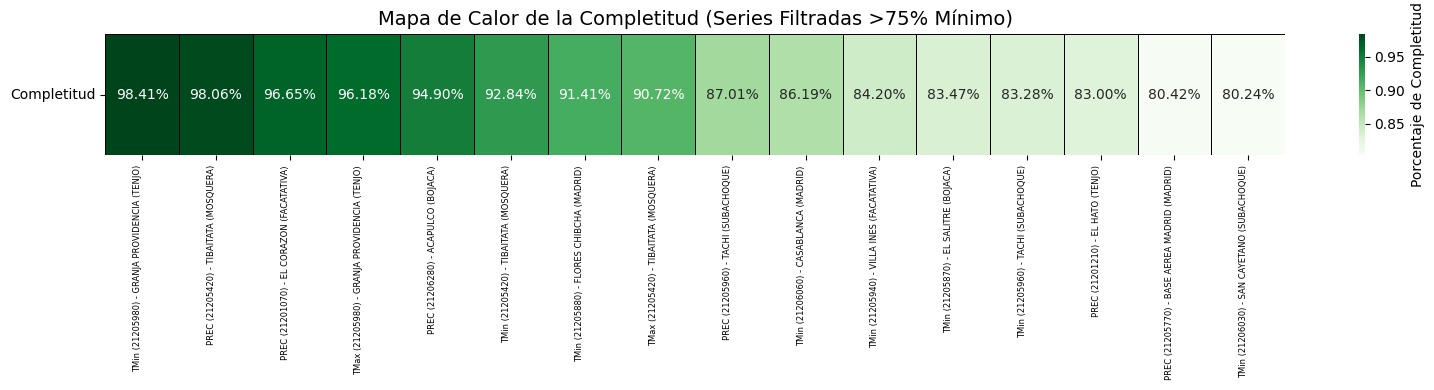


Gráfico final de COMPLETITUD generado y guardado en: D:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Visualizaciones\heatmap_completitud_final.png



In [22]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# ==================== CONFIGURACIÓN ====================
COMPLETITUD_UMBRAL = 0.75 # 75% de completitud mínima
OUTPUT_FILE_BASE = f'cundinamarca_filtrado_{int(COMPLETITUD_UMBRAL*100)}pct'

def obtener_version_archivo(directorio, nombre_base):
    """Genera un nombre de archivo con versión incremental."""
    archivos_existentes = list(directorio.glob(f"{nombre_base}_v*.csv"))
    if not archivos_existentes:
        return f"{nombre_base}_v1.csv"
    versiones = []
    for archivo in archivos_existentes:
        try:
            version_str = archivo.stem.split('_v')[-1]
            versiones.append(int(version_str))
        except:
            continue
    nueva_version = max(versiones) + 1 if versiones else 1
    return f"{nombre_base}_v{nueva_version}.csv"

# ==================== DEFINICIÓN DE RUTAS (CORREGIDO) ====================

# Definimos el directorio raíz del proyecto con un valor de fallback
base_proyecto = Path.cwd() 

try:
    import rutas
    # ⭐ CORREGIDO: Usamos rutas.base para la raíz del proyecto ⭐
    base_proyecto = rutas.base
    dir_input_output = rutas.datos_consolidados
    
except ImportError:
    # Si el módulo 'rutas' no existe, asumimos la estructura estándar
    dir_input_output = base_proyecto / "Datos" / "datos_consolidados"

dir_input_output.mkdir(parents=True, exist_ok=True)

# CREACIÓN DE VISUALIZACIONES EN LA RAÍZ DEL PROYECTO (base_proyecto)
dir_visualizaciones = base_proyecto / "Visualizaciones"
dir_visualizaciones.mkdir(parents=True, exist_ok=True)
print(f"✓ Directorio de visualizaciones creado en la raíz: {dir_visualizaciones.name}")


INPUT_FILE_BASE = 'cundinamarca_final_wide_con_nans'
INPUT_FILE_PATH = dir_input_output / f'{INPUT_FILE_BASE}_v1.csv'

OUTPUT_FILE_NAME = obtener_version_archivo(dir_input_output, OUTPUT_FILE_BASE)
OUTPUT_FILE_PATH = dir_input_output / OUTPUT_FILE_NAME

# ==================== FUNCIÓN CLAVE PARA ETIQUETAS ====================
def format_full_label(col_name):
    """
    Formatea el nombre completo de la columna para la etiqueta del gráfico.
    Ej: TMin_21206060_CASABLANCA_MADRID -> TMin (21206060) - CASABLANCA (MADRID)
    """
    parts = col_name.split('_')
    if len(parts) >= 4:
        variable = parts[0]
        codigo = parts[1]
        # El nombre de la estación puede tener más de una palabra, tomamos el resto hasta el municipio
        nombre_estacion_parts = parts[2:-1] 
        nombre_estacion = ' '.join(nombre_estacion_parts)
        municipio = parts[-1]
        
        # Formato de etiqueta completo
        return f"{variable} ({codigo}) - {nombre_estacion} ({municipio})"
    return col_name

# ==================== PROCESO DE FILTRADO Y DIAGNÓSTICO ====================
try:
    df = pd.read_csv(INPUT_FILE_PATH, parse_dates=['Fecha'])
    
    # 1. Calcular completitud y filtrar
    completitud_series = (1 - df.isnull().sum() / len(df))
    columnas_a_mantener = completitud_series[completitud_series >= COMPLETITUD_UMBRAL]
    series_a_mantener = columnas_a_mantener.index.tolist()
    
    if 'Fecha' in df.columns and 'Fecha' not in series_a_mantener:
        series_a_mantener.insert(0, 'Fecha')
        
    df_filtrado = df[series_a_mantener].copy()
    
    df_filtrado.to_csv(OUTPUT_FILE_PATH, index=False, encoding='utf-8-sig')
    
    print("\n" + "=" * 60)
    print("✅ FILTRADO COMPLETADO Y LISTO PARA VISUALIZACIÓN")
    print(f"   Archivo de salida: {OUTPUT_FILE_NAME}")
    print("=" * 60)

    # 2. Preparar datos para el Mapa de Calor de Completitud
    df_plot = df_filtrado.drop(columns=['Fecha'])
    completitud_final = (1 - df_plot.isnull().sum() / len(df_plot))
    df_completitud_plot = pd.DataFrame(completitud_final, columns=['Completitud'])

    # Aplicar el formato de etiqueta completo
    df_completitud_plot.index = [format_full_label(c) for c in df_completitud_plot.index]
    
    # Ordenar por completitud de MAYOR a MENOR
    df_completitud_plot = df_completitud_plot.sort_values(by='Completitud', ascending=False)
    
    # Usamos reshape (transpuesta) para que se vea como un heatmap de una fila
    completitud_matrix = df_completitud_plot.T 
    
    # 3. Generar el Mapa de Calor de COMPLETITUD
    print("\nGenerando Mapa de Calor de Completitud (Etiquetas Completas)...")
    
    # Ajustar el tamaño de la figura (más pequeño y ajustado)
    plt.figure(figsize=(16, 4)) 
    
    sns.heatmap(
        completitud_matrix, 
        annot=True,              
        cmap='Greens',           
        fmt=".2%",               
        linewidths=.5,           
        linecolor='black',
        cbar_kws={'label': 'Porcentaje de Completitud'}
    )
    
    # Configuración de Etiquetas y Título
    plt.title(f'Mapa de Calor de la Completitud (Series Filtradas >{COMPLETITUD_UMBRAL*100:.0f}% Mínimo)', fontsize=14)
    
    # Reducir el tamaño de la fuente de las etiquetas del eje X para que quepan
    plt.xticks(rotation=90, ha='right', fontsize=6) 
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    
    # ⭐ GUARDAR EL GRÁFICO EN LA RUTA CORREGIDA ⭐
    OUTPUT_IMAGE_PATH = dir_visualizaciones / 'heatmap_completitud_final.png'
    plt.savefig(OUTPUT_IMAGE_PATH)
    
    # Mostrar el gráfico (en un entorno interactivo)
    plt.show() 
    print(f"\nGráfico final de COMPLETITUD generado y guardado en: {OUTPUT_IMAGE_PATH}")
    print("\n" + "=" * 60)
    
except FileNotFoundError:
    print(f"\n✗ Error: No se encontró el archivo de entrada '{INPUT_FILE_PATH.name}'.")
    print("💡 Asegúrate de que el archivo generado en el paso anterior esté en la carpeta correcta.")
except Exception as e:
    print(f"\n✗ Ocurrió un error inesperado: {e}")

Análisis de Correlación -> soloo genera un grafico

✓ Archivo de entrada encontrado: cundinamarca_filtrado_75pct_v1.csv
✓ Directorio de visualizaciones creado en la raíz: Visualizaciones

INICIO: CÁLCULO DE LA MATRIZ DE CORRELACIÓN
✅ Matriz de Correlación calculada. Iniciando generación de Heatmap...

Generando Mapa de Calor de Correlación...


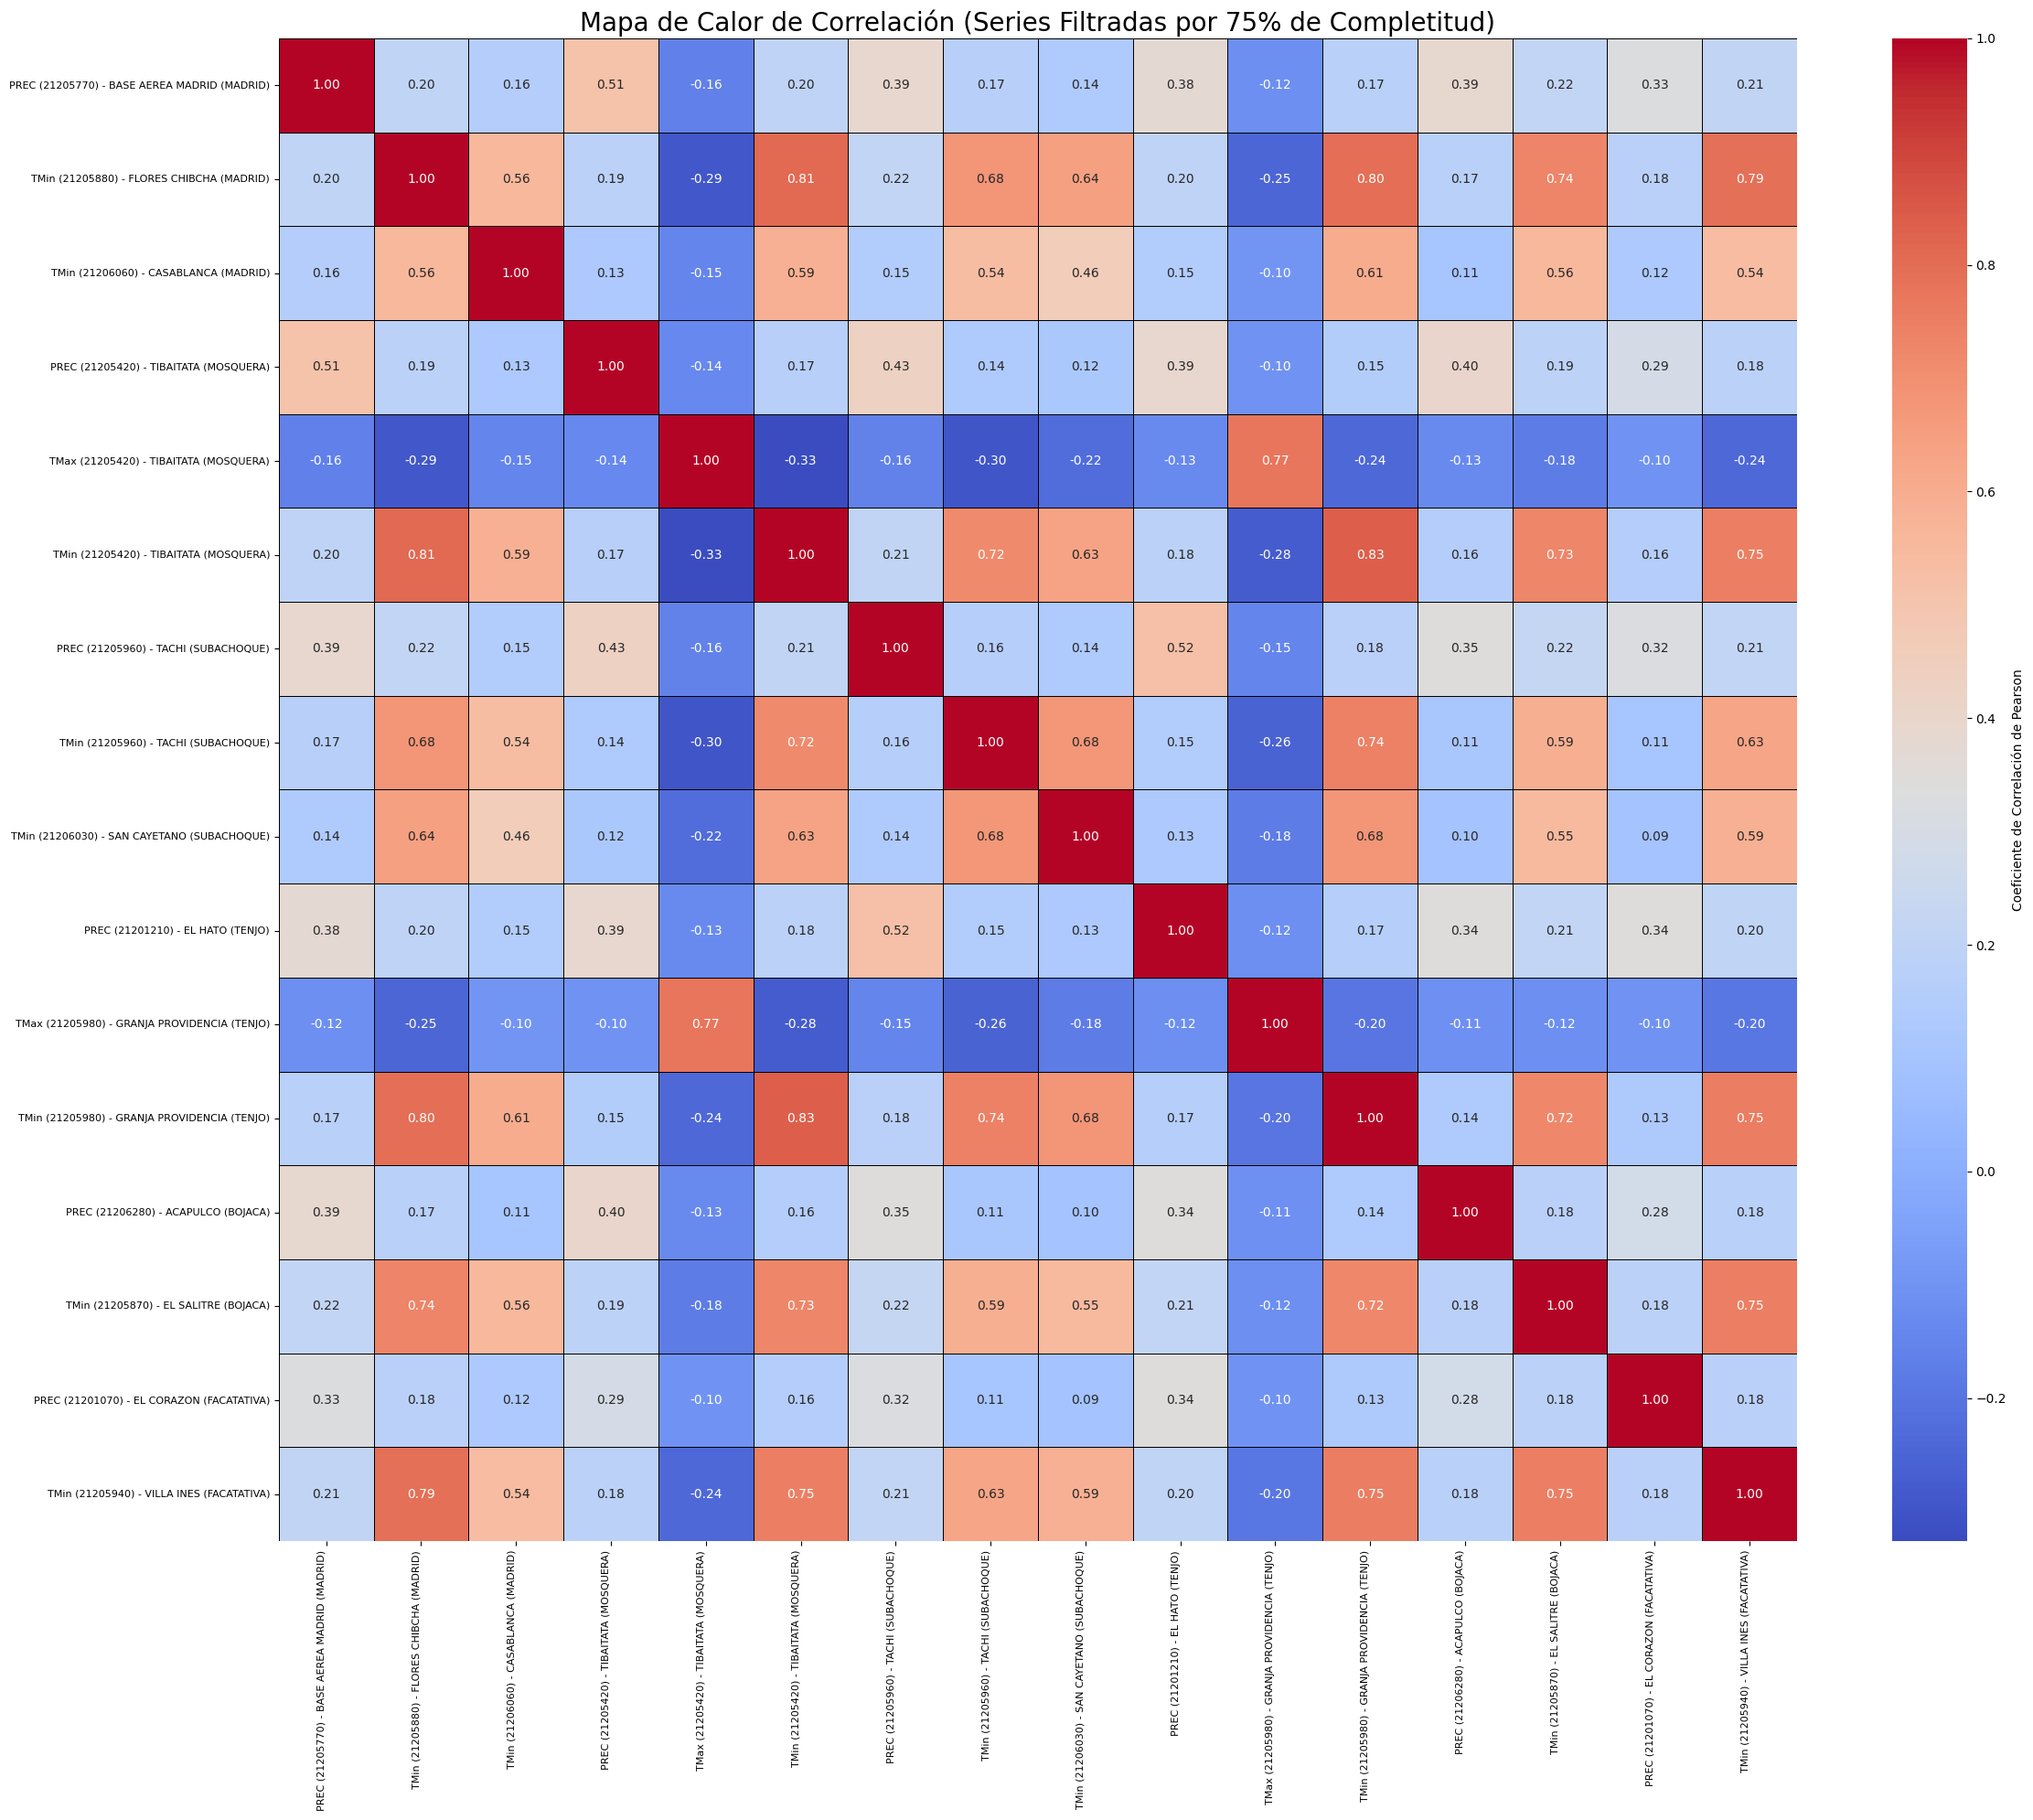

Gráfico generado como 'heatmap_correlacion_final.png' y guardado en: D:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Visualizaciones



In [23]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# ==================== FUNCIÓN DE ETIQUETADO ====================
def format_full_label(col_name):
    """
    Formatea el nombre completo de la columna para la etiqueta del gráfico.
    Ej: TMin_21206060_CASABLANCA_MADRID -> TMin (21206060) - CASABLANCA (MADRID)
    """
    parts = col_name.split('_')
    if len(parts) >= 4:
        variable = parts[0]
        codigo = parts[1]
        nombre_estacion_parts = parts[2:-1] 
        nombre_estacion = ' '.join(nombre_estacion_parts)
        municipio = parts[-1]
        
        # Formato de etiqueta completo
        return f"{variable} ({codigo}) - {nombre_estacion} ({municipio})"
    return col_name

# ==================== DEFINICIÓN DE RUTAS (CORREGIDO) ====================

# 1. Definimos la raíz del proyecto con un valor de fallback
base_proyecto = Path.cwd() 

try:
    import rutas
    # ⭐ CORREGIDO: Usamos rutas.base para la raíz del proyecto y rutas.datos_consolidados para el input/output ⭐
    base_proyecto = rutas.base
    dir_input_output = rutas.datos_consolidados
    
except ImportError:
    # Si el módulo 'rutas' no existe, asumimos la estructura estándar
    dir_input_output = base_proyecto / "Datos" / "datos_consolidados"

# 2. Intentar encontrar la última versión del archivo filtrado
file_pattern = 'cundinamarca_filtrado_75pct_v*.csv'
archivos_filtrados = sorted(dir_input_output.glob(file_pattern))

if not archivos_filtrados:
    print(f"\n✗ Error: No se encontró ningún archivo con el patrón '{file_pattern}' en el directorio de trabajo.")
    print("💡 Asegúrate de que el script de filtrado haya sido ejecutado correctamente.")
    df_corr = None
    exit() # Salir del script si no se encuentra el archivo
else:
    # Usar el archivo más reciente (el último en la lista ordenada)
    INPUT_FILE_PATH = archivos_filtrados[-1]
    print(f"✓ Archivo de entrada encontrado: {INPUT_FILE_PATH.name}")

# 3. CREACIÓN DE VISUALIZACIONES EN LA RAÍZ DEL PROYECTO (base_proyecto)
dir_visualizaciones = base_proyecto / "Visualizaciones"
dir_visualizaciones.mkdir(parents=True, exist_ok=True)
print(f"✓ Directorio de visualizaciones creado en la raíz: {dir_visualizaciones.name}")

# ==================== PROCESO DE CORRELACIÓN ====================
try:
    # 1. Cargar el DataFrame filtrado
    df_filtrado = pd.read_csv(INPUT_FILE_PATH, parse_dates=['Fecha'])
    
    print("\n" + "=" * 60)
    print("INICIO: CÁLCULO DE LA MATRIZ DE CORRELACIÓN")
    print("=" * 60)
    
    # 2. Calcular la matriz de correlación de Pearson (excluyendo la columna 'Fecha')
    df_corr = df_filtrado.drop(columns=['Fecha']).corr(method='pearson')
    
    # 3. Formatear las etiquetas para el gráfico
    formatted_labels = [format_full_label(c) for c in df_corr.columns]
    df_corr.columns = formatted_labels
    df_corr.index = formatted_labels
    
    print("✅ Matriz de Correlación calculada. Iniciando generación de Heatmap...")
    
except Exception as e:
    print(f"\n✗ Ocurrió un error al calcular la correlación: {e}")
    df_corr = None

# ==================== GENERAR EL MAPA DE CALOR ====================
if df_corr is not None and not df_corr.empty:
    
    # Usamos la herramienta de visualización para generar el heatmap
    print("\nGenerando Mapa de Calor de Correlación...")
    
    # Definición de la figura (más grande para que los nombres completos quepan)
    plt.figure(figsize=(24, 20)) 
    
    # Generación del Heatmap
    sns.heatmap(
        df_corr, 
        annot=True,              # Mostrar el valor de correlación
        cmap='coolwarm',         # Esquema de color: rojo (negativo) a azul (positivo)
        fmt=".2f",               # Formato de dos decimales
        linewidths=.5,           # Líneas para separar celdas
        linecolor='black',
        cbar_kws={'label': 'Coeficiente de Correlación de Pearson'}
    )
    
    # Configuración de Etiquetas y Título
    plt.title('Mapa de Calor de Correlación (Series Filtradas por 75% de Completitud)', fontsize=20)
    plt.xticks(rotation=90, ha='right', fontsize=8) # Reducir fuente y rotar para legibilidad
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout() # Ajusta el diseño para que las etiquetas no se corten
    
    # ⭐ GUARDAR EL GRÁFICO EN LA RUTA CORREGIDA ⭐
    OUTPUT_IMAGE_PATH = dir_visualizaciones / 'heatmap_correlacion_final.png'
    plt.savefig(OUTPUT_IMAGE_PATH)
    
    # Mostrar el gráfico
    plt.show() 
    print(f"Gráfico generado como '{OUTPUT_IMAGE_PATH.name}' y guardado en: {dir_visualizaciones}")
    
    print("\n" + "=" * 60)

Filtrado y Guardado de Pares con Alta Correlación ( > 0.75) -> matriz_correlacion_mayor_75.csv

In [16]:
import pandas as pd
from pathlib import Path

# ==================== CONFIGURACIÓN ====================
CORRELACION_UMBRAL = 0.75 # Umbral mínimo de correlación para considerar un 'vecino'
OUTPUT_FILE_BASE = f'matriz_correlacion_mayor_{int(CORRELACION_UMBRAL*100)}'

# ==================== FUNCIÓN DE ETIQUETADO ====================
def format_full_label(col_name):
    """
    Formatea el nombre completo de la columna para la etiqueta del gráfico.
    Usa el nombre completo de la columna como identificador.
    """
    parts = col_name.split('_')
    if len(parts) >= 4:
        variable = parts[0]
        codigo = parts[1]
        nombre_estacion_parts = parts[2:-1] 
        nombre_estacion = ' '.join(nombre_estacion_parts)
        municipio = parts[-1]
        
        # Devolver el nombre original de la columna para guardarlo en el archivo
        return col_name
    return col_name

# ==================== DEFINICIÓN DE RUTAS ====================
try:
    import rutas
    dir_input_output = rutas.datos_consolidados
except ImportError:
    base = Path.cwd()
    dir_input_output = base / "Datos" / "datos_consolidados"

# Intentar encontrar la última versión del archivo filtrado
file_pattern = 'cundinamarca_filtrado_75pct_v*.csv'
archivos_filtrados = sorted(dir_input_output.glob(file_pattern))

if not archivos_filtrados:
    print(f"\n✗ Error: No se encontró ningún archivo con el patrón '{file_pattern}' en el directorio de trabajo.")
    exit()
else:
    # Usar el archivo más reciente (el último en la lista ordenada)
    INPUT_FILE_PATH = archivos_filtrados[-1]

# Nombre del archivo de salida
OUTPUT_FILE_NAME = f'{OUTPUT_FILE_BASE}.csv'
OUTPUT_FILE_PATH = dir_input_output / OUTPUT_FILE_NAME

# ==================== PROCESO DE FILTRADO DE CORRELACIÓN ====================
print("\n" + "=" * 60)
print(f"INICIO: EXTRACCIÓN DE PARES CON CORRELACIÓN > {CORRELACION_UMBRAL}")
print("=" * 60)

try:
    # 1. Cargar el DataFrame filtrado (el usado para el heatmap)
    df_filtrado = pd.read_csv(INPUT_FILE_PATH, parse_dates=['Fecha'])
    
    # 2. Calcular la matriz de correlación
    df_corr = df_filtrado.drop(columns=['Fecha']).corr(method='pearson')
    
    # 3. Desenvolver la matriz (unstack) para convertirla en una lista de pares
    # Usamos .stack() para convertir la matriz simétrica en una lista larga (Serie de Pandas)
    corr_pares = df_corr.stack().reset_index()
    corr_pares.columns = ['Serie_A', 'Serie_B', 'Correlacion']
    
    # 4. Filtrar los pares que cumplen tres criterios:
    # a) Correlación > Umbral (0.75)
    # b) No son la misma serie (Serie_A != Serie_B) -> Evita el 1.0 de la diagonal
    # c) Eliminar duplicados (evitar A-B y B-A) -> Solo guardamos A-B si el índice de A < B
    
    # Criterio a y b
    df_alta_corr = corr_pares[
        (corr_pares['Correlacion'] > CORRELACION_UMBRAL) & 
        (corr_pares['Serie_A'] != corr_pares['Serie_B'])
    ].copy()
    
    # Criterio c: eliminar duplicados (ej: TMin_Madrid-TMin_Mosquera y TMin_Mosquera-TMin_Madrid)
    # La forma más simple es usar un índice alfabético
    df_alta_corr['Sorted_Pair'] = df_alta_corr.apply(
        lambda row: tuple(sorted([row['Serie_A'], row['Serie_B']])), axis=1
    )
    df_alta_corr = df_alta_corr.drop_duplicates(subset=['Sorted_Pair'])
    
    # 5. Seleccionar y ordenar las columnas finales
    df_final = df_alta_corr[['Serie_A', 'Serie_B', 'Correlacion']].sort_values(
        by='Correlacion', ascending=False
    )
    
    # 6. Guardar el archivo CSV
    df_final.to_csv(OUTPUT_FILE_PATH, index=False, encoding='utf-8-sig')
    
    # 7. Resumen
    print(f"✓ Pares con alta correlación guardados exitosamente.")
    print(f"   Total de pares encontrados (Correlación > {CORRELACION_UMBRAL}): **{len(df_final):,}**")
    print(f"\n📄 Archivo creado: **{OUTPUT_FILE_NAME}**")
    print(f"📍 Ubicación: {OUTPUT_FILE_PATH}")
    
    print("\n" + "=" * 60)

except FileNotFoundError:
    print(f"\n✗ Error: No se encontró el archivo de entrada '{INPUT_FILE_PATH.name}'.")
    print("💡 Asegúrate de que el archivo filtrado esté disponible.")
except Exception as e:
    print(f"\n✗ Ocurrió un error inesperado al procesar la correlación: {e}")


INICIO: EXTRACCIÓN DE PARES CON CORRELACIÓN > 0.75
✓ Pares con alta correlación guardados exitosamente.
   Total de pares encontrados (Correlación > 0.75): **7**

📄 Archivo creado: **matriz_correlacion_mayor_75.csv**
📍 Ubicación: D:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_consolidados\matriz_correlacion_mayor_75.csv



Filtrado y Guardado de Pares con Alta Correlación ( > 0.70) -> -> matriz_correlacion_mayor_75.csv

In [17]:
import pandas as pd
from pathlib import Path

# ==================== CONFIGURACIÓN REVISADA ====================
CORRELACION_UMBRAL = 0.70 # Umbral ajustado para incluir más vecinos
OUTPUT_FILE_BASE = f'matriz_correlacion_mayor_{int(CORRELACION_UMBRAL*100)}'

# ==================== FUNCIÓN DE RUTAS Y ETIQUETADO ====================
def format_full_label(col_name):
    # Usar el nombre original de la columna
    return col_name

try:
    import rutas
    dir_input_output = rutas.datos_consolidados
except ImportError:
    base = Path.cwd()
    dir_input_output = base / "Datos" / "datos_consolidados"

file_pattern = 'cundinamarca_filtrado_75pct_v*.csv'
archivos_filtrados = sorted(dir_input_output.glob(file_pattern))

if not archivos_filtrados:
    print(f"\n✗ Error: No se encontró ningún archivo con el patrón '{file_pattern}'.")
    exit()
else:
    INPUT_FILE_PATH = archivos_filtrados[-1]

OUTPUT_FILE_NAME = f'{OUTPUT_FILE_BASE}.csv'
OUTPUT_FILE_PATH = dir_input_output / OUTPUT_FILE_NAME

# ==================== PROCESO DE FILTRADO DE CORRELACIÓN ====================
print("\n" + "=" * 60)
print(f"INICIO: EXTRACCIÓN DE PARES CON CORRELACIÓN > {CORRELACION_UMBRAL} (Umbral Ajustado)")
print("=" * 60)

try:
    # 1. Cargar el DataFrame filtrado
    df_filtrado = pd.read_csv(INPUT_FILE_PATH, parse_dates=['Fecha'])
    
    # 2. Calcular la matriz de correlación
    df_corr = df_filtrado.drop(columns=['Fecha']).corr(method='pearson')
    
    # 3. Desenvolver la matriz
    corr_pares = df_corr.stack().reset_index()
    corr_pares.columns = ['Serie_A', 'Serie_B', 'Correlacion']
    
    # 4. Filtrar y eliminar duplicados
    df_alta_corr = corr_pares[
        (corr_pares['Correlacion'] > CORRELACION_UMBRAL) & 
        (corr_pares['Serie_A'] != corr_pares['Serie_B'])
    ].copy()
    
    df_alta_corr['Sorted_Pair'] = df_alta_corr.apply(
        lambda row: tuple(sorted([row['Serie_A'], row['Serie_B']])), axis=1
    )
    df_alta_corr = df_alta_corr.drop_duplicates(subset=['Sorted_Pair'])
    
    # 5. Seleccionar y guardar
    df_final = df_alta_corr[['Serie_A', 'Serie_B', 'Correlacion']].sort_values(
        by='Correlacion', ascending=False
    )
    
    df_final.to_csv(OUTPUT_FILE_PATH, index=False, encoding='utf-8-sig')
    
    # 6. Resumen
    print(f"✓ Pares con alta correlación guardados exitosamente.")
    print(f"   Total de pares encontrados (Correlación > {CORRELACION_UMBRAL}): **{len(df_final):,}**")
    print(f"\n📄 Archivo creado: **{OUTPUT_FILE_NAME}**")
    
    print("\n" + "=" * 60)

except Exception as e:
    print(f"\n✗ Ocurrió un error inesperado al procesar la correlación: {e}")


INICIO: EXTRACCIÓN DE PARES CON CORRELACIÓN > 0.7 (Umbral Ajustado)
✓ Pares con alta correlación guardados exitosamente.
   Total de pares encontrados (Correlación > 0.7): **13**

📄 Archivo creado: **matriz_correlacion_mayor_70.csv**



valores atipicos-> Script de detección de outliers (IQR mensual)cundinamarca_sin_outliers_IQR_Mensual_v1.csvConvierte valores raros/extremos en NaN

In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np

# ==================== CONFIGURACIÓN ====================
# Factor para el IQR. 1.5 es el valor estándar.
# Usaremos 1.5 para una detección estándar y robusta.
IQR_FACTOR = 1.5 
OUTPUT_FILE_BASE = 'cundinamarca_sin_outliers_IQR_Mensual'


def obtener_version_archivo(directorio, nombre_base):
    """Genera un nombre de archivo con versión incremental."""
    archivos_existentes = list(directorio.glob(f"{nombre_base}_v*.csv"))
    if not archivos_existentes:
        return f"{nombre_base}_v1.csv"
    versiones = []
    for archivo in archivos_existentes:
        try:
            version_str = archivo.stem.split('_v')[-1]
            versiones.append(int(version_str))
        except:
            continue
    nueva_version = max(versiones) + 1 if versiones else 1
    return f"{nombre_base}_v{nueva_version}.csv"

# ==================== DEFINICIÓN DE RUTAS ====================
try:
    import rutas
    dir_input_output = rutas.datos_consolidados
except ImportError:
    base = Path.cwd()
    dir_input_output = base / "Datos" / "datos_consolidados"

# Intentar encontrar la última versión del archivo filtrado (entrada)
file_pattern = 'cundinamarca_filtrado_75pct_v*.csv'
archivos_filtrados = sorted(dir_input_output.glob(file_pattern))

if not archivos_filtrados:
    print(f"\n✗ Error: No se encontró ningún archivo con el patrón '{file_pattern}'.")
    exit()
else:
    INPUT_FILE_PATH = archivos_filtrados[-1]
    
# Definir ruta de salida
OUTPUT_FILE_NAME = obtener_version_archivo(dir_input_output, OUTPUT_FILE_BASE)
OUTPUT_FILE_PATH = dir_input_output / OUTPUT_FILE_NAME

# ==================== FUNCIÓN DE LIMPIEZA IQR MENSUAL ====================
def replace_outliers_with_nan_iqr_mensual(df, factor=1.5):
    """
    Identifica y reemplaza los outliers de cada columna con NaN usando el método IQR,
    calculando el IQR de forma MENSUAL (estacional).
    """
    df_outliers_cleaned = df.copy()
    outliers_count = 0
    
    # 1. Asegurar que 'Fecha' esté como índice para acceder a los meses fácilmente
    if 'Fecha' in df_outliers_cleaned.columns:
        df_outliers_cleaned = df_outliers_cleaned.set_index('Fecha')
        
    # Iterar sobre cada columna (serie de tiempo)
    for col in df_outliers_cleaned.columns:
        
        # 2. Calcular los límites (Q1, Q3, IQR) para cada mes.
        # Esto nos da 12 conjuntos de límites para cada serie.
        Q1 = df_outliers_cleaned[col].groupby(df_outliers_cleaned.index.month).quantile(0.25)
        Q3 = df_outliers_cleaned[col].groupby(df_outliers_cleaned.index.month).quantile(0.75)
        
        IQR = Q3 - Q1
        
        # 3. Mapear los límites a cada día/fila del DataFrame
        lower_bounds = Q1.loc[df_outliers_cleaned.index.month] - (factor * IQR.loc[df_outliers_cleaned.index.month])
        upper_bounds = Q3.loc[df_outliers_cleaned.index.month] + (factor * IQR.loc[df_outliers_cleaned.index.month])

        # Asegurar que las series temporales de límites tienen el mismo índice que el DF original
        lower_bounds.index = df_outliers_cleaned.index
        upper_bounds.index = df_outliers_cleaned.index
        
        # 4. Identificar outliers (donde el valor está fuera de su límite mensual)
        is_outlier = (df_outliers_cleaned[col] < lower_bounds) | (df_outliers_cleaned[col] > upper_bounds)
        
        # 5. Contar y reemplazar
        current_outliers = is_outlier.sum()
        outliers_count += current_outliers
        
        df_outliers_cleaned.loc[is_outlier, col] = np.nan
        
    # Devolver la columna 'Fecha' a su estado normal
    df_outliers_cleaned = df_outliers_cleaned.reset_index()
    
    return df_outliers_cleaned, outliers_count

# ==================== PROCESO PRINCIPAL ====================
try:
    df = pd.read_csv(INPUT_FILE_PATH, parse_dates=['Fecha'])
    
    print("\n" + "=" * 60)
    print("INICIO: LIMPIEZA DE OUTLIERS (MÉTODO IQR MENSUAL)")
    print(f"Fuente: {INPUT_FILE_PATH.name}")
    print(f"Factor IQR: {IQR_FACTOR}")
    print("=" * 60)
    
    # Ejecutar la limpieza
    df_limpio, total_outliers_encontrados = replace_outliers_with_nan_iqr_mensual(df, IQR_FACTOR)
    
    # 3. Guardar el archivo
    df_limpio.to_csv(OUTPUT_FILE_PATH, index=False, encoding='utf-8-sig')
    
    # 4. Resumen
    print(f"\n✅ PROCESO COMPLETADO.")
    print(f"   Total de *outliers* (reemplazados por NaN): **{total_outliers_encontrados:,}**")
    print(f"   Archivo guardado y listo para imputación: **{OUTPUT_FILE_NAME}**")
    print("\n" + "=" * 60)
    
except Exception as e:
    print(f"\n✗ Ocurrió un error inesperado durante la limpieza de outliers: {e}")


INICIO: LIMPIEZA DE OUTLIERS (MÉTODO IQR MENSUAL)
Fuente: cundinamarca_filtrado_75pct_v1.csv
Factor IQR: 1.5

✅ PROCESO COMPLETADO.
   Total de *outliers* (reemplazados por NaN): **9,486**
   Archivo guardado y listo para imputación: **cundinamarca_sin_outliers_IQR_Mensual_v1.csv**



In [14]:
import json
import math
from pathlib import Path

# ============================================================
# RUTAS
# ============================================================
base_proyecto = Path.cwd()
dir_input = base_proyecto / "Datos" / "datos_prediccion"

archivo_entrada = dir_input / "madrid.geojson"
archivo_salida = dir_input / "madrid_wgs84.geojson"

print("📂 Leyendo:", archivo_entrada)

# ============================================================
# FORMULAS DE CONVERSIÓN EPSG:3857 → EPSG:4326
# ============================================================
R = 6378137.0  # radio de la Tierra para Web Mercator

def mercator_to_lonlat(x, y):
    lon = (x / R) * (180 / math.pi)
    lat = (2 * math.atan(math.exp(y / R)) - math.pi / 2) * (180 / math.pi)
    return lon, lat

# ============================================================
# LEER ARCHIVO GEOJSON
# ============================================================
with open(archivo_entrada, "r", encoding="utf-8") as f:
    data = json.load(f)

# ============================================================
# CONVERTIR TODOS LOS POLÍGONOS
# ============================================================
def convertir_coords(lista):
    nuevas = []
    for x, y in lista:
        lon, lat = mercator_to_lonlat(x, y)
        nuevas.append([lon, lat])
    return nuevas

for feature in data["features"]:
    geom = feature["geometry"]

    if geom["type"] == "Polygon":
        geom["coordinates"][0] = convertir_coords(geom["coordinates"][0])

    elif geom["type"] == "MultiPolygon":
        for i, poly in enumerate(geom["coordinates"]):
            geom["coordinates"][i][0] = convertir_coords(poly[0])

# ============================================================
# GUARDAR RESULTADO
# ============================================================
with open(archivo_salida, "w", encoding="utf-8") as f:
    json.dump(data, f, indent=4)

print("✅ Archivo convertido correctamente:")
print("   ", archivo_salida)


📂 Leyendo: d:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_prediccion\madrid.geojson
✅ Archivo convertido correctamente:
    d:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_prediccion\madrid_wgs84.geojson
